In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/FHCampbell71/ComputationalStats/main/a1_data.csv')

In [ ]:
# import statistics
# statistics.mean(df)

In [ ]:
pip install gcastle==1.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install CausalPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.0/683.0 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninsta

(11672, 11)
[[0 1 1 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]]


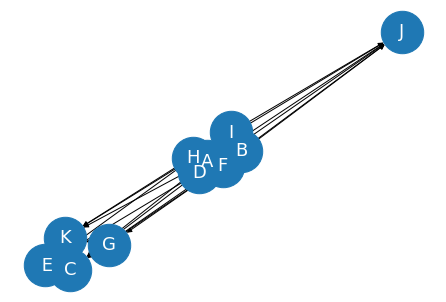

In [ ]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import castle

os.environ['CASTLE_BACKEND'] = 'pytorch'

from collections import OrderedDict
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

import matplotlib.pyplot as plt

#print dataframe
#print(df["A"].head())
# Let's generate the data according to Fig 2. A.
A = df["A"]
B = df["B"]
C = df["C"]
D = df["D"]
E = df["E"]
F = df["F"]
G = df["G"]
H = df["H"]
I = df["I"]
J = df["J"]
K = df["K"]


# To matrix
pc_dataset = np.vstack([A, B, C, D, E, F, G, H, I, J, K]).T

# Sanity check
print(pc_dataset.shape)

# (1000, 4)

# Build the model
pc = PC()
pc.learn(pc_dataset)

# Print out the learned matrix
print(pc.causal_matrix)

# Tensor([[0, 0, 1, 0],
#         [0, 0, 1, 0],
#         [0, 0, 0, 1],
#         [0, 0, 0, 0]])

# Get learned graph
learned_graph = nx.DiGraph(pc.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(12), ["A", "B", "C", "D", " E", "F", "G", "H", "I", "J", "K"])}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=1800,
    font_size=18,
    font_color='white'
)

(5836, 11)
[[0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 1 0 1 1 0]
 [1 0 0 0 0 0 1 1 1 0 0]
 [1 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0]]


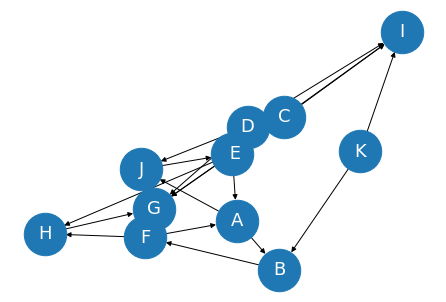

In [ ]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import castle

os.environ['CASTLE_BACKEND'] = 'pytorch'

from collections import OrderedDict
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG
from castle.algorithms import PC

import matplotlib.pyplot as plt

df_split = np.array_split(df, 2)
#print dataframe
#print(df["A"].head())
# Let's generate the data according to Fig 2. A.
A = df_split[0]["A"]
B = df_split[0]["B"]
C = df_split[0]["C"]
D = df_split[0]["D"]
E = df_split[0]["E"]
F = df_split[0]["F"]
G = df_split[0]["G"]
H = df_split[0]["H"]
I = df_split[0]["I"]
J = df_split[0]["J"]
K = df_split[0]["K"]


# To matrix
pc_dataset = np.vstack([A, B, C, D, E, F, G, H, I, J, K]).T

# Sanity check
print(pc_dataset.shape)

# (1000, 4)

# Build the model
pc = PC()
pc.learn(pc_dataset)

# Print out the learned matrix
print(pc.causal_matrix)

# Tensor([[0, 0, 1, 0],
#         [0, 0, 1, 0],
#         [0, 0, 0, 1],
#         [0, 0, 0, 0]])

# Get learned graph
learned_graph = nx.DiGraph(pc.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(12), ["A", "B", "C", "D", " E", "F", "G", "H", "I", "J", "K"])}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

# Plot the graph
nx.draw(
    learned_graph, 
    with_labels=True,
    node_size=1800,
    font_size=18,
    font_color='white'
)